In [ ]:
def get_connectedComponents(G):
    return nx.connected_components(G)

def pairwiseConnectivity(G):
    comps =  get_connectedComponents(G)
    return sum(map((lambda x: len(x)*(len(x)-1)/2), comps))

def largestConnectedComponent(G):
    comps =  get_connectedComponents(G)
    return len(max(comps, key=len))   

def numberConnectedComponent(G):
    return  nx.number_connected_components(G)
def area_under_curve(condMaxNum,N,number_nodes,value):
    value = np.array(value)
    if condMaxNum:
        value = ((N-value)/N)
    else:
        value = value/value[0]
    return auc(number_nodes,value)
'''for a, n in enumerate(c):
    #print([0,a+1] )        
    #print([0,a+1] )        
    for b in G.edges(n):
        #print([0,a+1] )        
        print(b[0],b[1])         
        #print(b[0],b[1])  '''

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import auc
#Color: 
#red: e41a1c
#blue: 377eb8
#green: 4daf4a
G = nx.read_edgelist("./Dataset/Real/test.txt", nodetype=int)
def draw_graph(G):
    seed = 13642 
    pos = nx.spring_layout(G, seed=seed)

    node_sizes = [100 + 50 * G.degree[i] for i in G]
    M = G.number_of_edges()
    cmap = plt.cm.plasma
    options = {"edgecolors": "tab:gray", "node_size": node_sizes, "alpha": 1}
    nodes = nx.draw_networkx_nodes(G, pos, node_color="pink",label=True,**options)
    edges = nx.draw_networkx_edges(
        G,
        pos,
        edge_color = '#e41a1c',
        node_size=node_sizes,
        width=2,
    )
    # some math labels
    labels = {}
    labels = {i: i for i in G}
    nx.draw_networkx_labels(G, pos, labels, font_size=20, font_color="black")

    ax = plt.gca()
    ax.set_axis_off()
    plt.show()

# LCC

In [ ]:
def get_minvalue(inputlist, obj):
    if obj.__name__ == "numberConnectedComponent":
        min_value = max(inputlist)
    else:
        min_value = min(inputlist)

 
 
    #return the index of minimum value 
 
    min_index=[]
 
    for i in range(0,len(inputlist)):
 
      if min_value == inputlist[i]:
        min_index.append(i)
 
    return min_index
def episode(G_org,c, objFunction):
    H = G_org.subgraph(G_org.nodes()).copy()
    lcc = [objFunction(H)]
    for i in c:
        r_edges = list(H.edges(i))   
        H.remove_edges_from(r_edges)
        lcc.append(objFunction(H))
    return lcc
    
def search(G_org, G, objFunction,removedNodes=[],targetNode=None):
    N = len(G)
    number_nodes= np.flip(np.arange(N+1)[N:0:-1]/N)
    number_nodes = np.insert(number_nodes,0,0)
    if (len(removedNodes)==N):
        return removedNodes
    if objFunction.__name__ == "numberConnectedComponent":
        condMaxNum = True
    else:
        condMaxNum = False
    if targetNode != None:
        r_edges = list(G.edges(targetNode))   
        G.remove_edges_from(r_edges)
        removedNodes.append(targetNode)
    if (len(G.edges())==1):
        return(removedNodes) 
    else:
        decrease_lcc=[]
        for j in range(N):
            H = G.subgraph(G.nodes()).copy()
            r_edges = list(H.edges(j))   
            H.remove_edges_from(r_edges)
            if j in removedNodes:
                if condMaxNum:
                    decrease_lcc.append(-1000)
                else:
                    decrease_lcc.append(1000)
            else:
                decrease_lcc.append(objFunction(H))
        index = get_minvalue(decrease_lcc,objFunction)
        if (decrease_lcc[index[0]]) > 700:
            return removedNodes
        else:
            if len(index)>1:       
                valueResult = []
                aucResult = []
                for this,i in enumerate(index):
                    optimal = search(G_org,G.copy(),objFunction,removedNodes,targetNode=i)
                    value = episode(G_org,optimal, objFunction)
                    value = np.array(value)/N
                    auc = area_under_curve(condMaxNum,N,number_nodes[:len(value)],value)
                    valueResult.append(optimal)
                    aucResult.append(auc)
                value = valueResult[get_minvalue(aucResult,objFunction)[0]]
            else:     
                optimal = search(G_org,G.copy(),objFunction,removedNodes,targetNode=index[0])
                value = optimal
            return value

In [ ]:
fh = open("./Dataset/Real/demo.txt", "rb")
G = nx.read_edgelist(fh, nodetype=int)
fh.close()
N = len(G)
c = search(G.subgraph(G.nodes()).copy(),G.subgraph(G.nodes()).copy(),largestConnectedComponent)
value = episode(G,c,largestConnectedComponent)
print("Optimal",c)
print("LCC",value)
number_nodes= np.flip(np.arange(N+1)[N:0:-1]/N)
number_nodes = np.insert(number_nodes,0,0)
print(area_under_curve(False,N,number_nodes[:len(value)],value))
#lcc: [0, 1, 2, 4, 3, 5, 26, 7, 17, 30, 6, 11, 24, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 31, 26, 27, 28, 29, 32]  

In [ ]:
fh = open("./Dataset/Real/demo.txt", "rb")
G = nx.read_edgelist(fh, nodetype=int)
N = len(G)
fh.close()
c = search(G.subgraph(G.nodes()).copy(),G.subgraph(G.nodes()).copy(),pairwiseConnectivity)
value = episode(G,c,pairwiseConnectivity)
print("Optimal",c)
print("LCC",value)
number_nodes= np.flip(np.arange(N+1)[N:0:-1]/N)
number_nodes = np.insert(number_nodes,0,0)
print(area_under_curve(False,N,number_nodes[:len(value)],value))
#pairwise: [1, 2, 3, 4, 5, 26, 7, 17, 30, 11, 6, 24, 25, 28, 29, 24, 0, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 27]

In [ ]:
fh = open("./Dataset/Real/demo.txt", "rb")
G = nx.read_edgelist(fh, nodetype=int)
N = len(G)
fh.close()
c = search(G.subgraph(G.nodes()).copy(),G.subgraph(G.nodes()).copy(),numberConnectedComponent)
value = episode(G,c,numberConnectedComponent)
print("Optimal",c)
print("LCC",value)
number_nodes= np.flip(np.arange(N+1)[N:0:-1]/N)
number_nodes = np.insert(number_nodes,0,0)
print(area_under_curve(False,N,number_nodes[:len(value)],value))
#numberConnected: [2, 1, 3, 4, 5, 7, 17, 26, 30, 6, 11, 24, 25, 28, 11, 29, 24, 0, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 27]

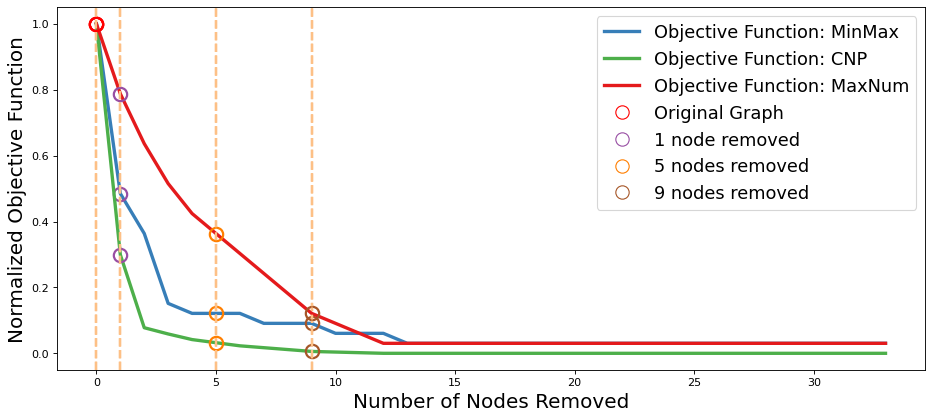

In [301]:
fh = open("./Dataset/Real/demo.txt", "rb")
G = nx.read_edgelist(fh, nodetype=int)
fh.close()
maxNum = [2, 1, 3, 4, 5, 7, 17, 26, 30, 6, 11, 24, 25, 28, 29, 0, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 27,31,32]
cnp = [1, 2, 3, 4, 5, 26, 7, 17, 30, 11, 6, 24, 25, 28, 29, 0, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 27,31,32]
lcc = [0, 1, 2, 4, 3, 5, 26, 7, 17, 30, 6, 11, 24, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 31, 27, 28, 29, 32]

def plotValue(G,lis,obj,index):
    colors_mark = ['red','#984ea3','#ff7f00','#a65628']
    N = len(G)
    val = np.array(episode(G.subgraph(G.nodes()).copy(),lis,obj))
    if obj.__name__ == "numberConnectedComponent":
        val = (N-val+1)/N
        name = "MaxNum"
        color = "#e41a1c"
        cond = True
    else:
        val = val/val[0]
        if obj.__name__ == "largestConnectedComponent":
            name = "MinMax"
            color = "#377eb8"  
            cond = False
        else:
            name = "CNP"
            color = "#4daf4a"  
            cond = False
            
    x= np.flip(np.arange(N+1)[N:0:-1])
    x = np.insert(x,0,0)
    plt.plot(x,val,label= "Objective Function: "+name, color =color,linewidth = 3)
    for i, numRemovedNode in enumerate([0,1,5,9]): 
        plt.plot(x[numRemovedNode], val[numRemovedNode], marker="o", markersize=12, markeredgecolor=colors_mark[i], markerfacecolor="None",markeredgewidth=2)
        plt.axvline(x = numRemovedNode, color = '#fdc086', linestyle='--', linewidth=2)
        if cond:
            if numRemovedNode == 0:
                plt.plot(x[numRemovedNode], val[numRemovedNode],color ='white', marker="o", markersize=12, markeredgecolor=colors_mark[i], markerfacecolor="None",markeredgewidth=1,label = "Original Graph")
            elif numRemovedNode == 1:
                plt.plot(x[numRemovedNode], val[numRemovedNode],color ='white', marker="o", markersize=12, markeredgecolor=colors_mark[i], markerfacecolor="None",markeredgewidth=1,label = str(numRemovedNode)+ " node removed")
            else:
                plt.plot(x[numRemovedNode], val[numRemovedNode],color ='white', marker="o", markersize=12, markeredgecolor=colors_mark[i], markerfacecolor="None",markeredgewidth=1,label=str(numRemovedNode)+ " nodes removed")
            

plt.figure(figsize=(14, 6), dpi=80)
plotValue(G,lcc,largestConnectedComponent,11)
plotValue(G,cnp,pairwiseConnectivity,12)
plotValue(G,maxNum,numberConnectedComponent,13)
plt.xlabel('Number of Nodes Removed', fontsize = 18)
plt.ylabel('Normalized Objective Function', fontsize = 18)

plt.legend(fontsize = 16)
plt.savefig("./")
plt.show()

